In [1]:
# Niema Attarian - G00346901
# The following code was taken from https://www.ics.uci.edu/~mohamadt/keras_mnist.html 
# in order to understand the model in which written numerals are recognised.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.regularizers import l2

# Load data.
# Defining the tuples and loading the data, (x is data, y is labels)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Here we are shaping the the array without changing the data
print("Original X shape", X_train.shape) 
print("Original Y shape", Y_train.shape)

# Reshape data.
X_train = X_train.reshape(60000, 784)
X_test  = X_test.reshape(10000, 784)

# Casting to a float array
X_train = X_train.astype('float32') 
X_test  = X_test.astype('float32')

# Normalising to a common scale without losing information
X_train /= 255 # Original data is uint8 (0-255). Scale it to range [0,1].
X_test  /= 255

print("Training X matrix shape", X_train.shape) 
print("Testing X matrix shape", X_test.shape)

Using TensorFlow backend.


Original X shape (60000, 28, 28)
Original Y shape (60000,)
Training X matrix shape (60000, 784)
Testing X matrix shape (10000, 784)


In [2]:
# Represent the targets as one-hot vectors: e.g. 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0].
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes) # to_categorical converts a class vector into a binary class matrix 
Y_test  = np_utils.to_categorical(Y_test, nb_classes) # and returns a binary matrix representation of the class. ( [0, 0, 1, ... 0] )

print("Training Y matrix shape", Y_train.shape)
print("Testing Y matrix shape", Y_test.shape)

Training Y matrix shape (60000, 10)
Testing Y matrix shape (10000, 10)


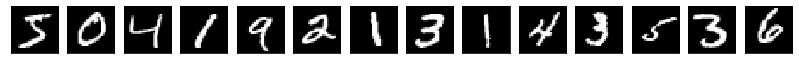

In [3]:
# Plot examples of the data.
plt.figure(1, figsize=(14,14))
for i in range(14):
    plt.subplot(1,14,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.xticks([]) # ticks along the x axis
    plt.yticks([]) # ticks along the y axis 

In [4]:
# Simple fully-connected neural network with 2 hidden layers.
model = Sequential()
# Layers
model.add(Dense(256, activation='relu', input_shape=(784,), W_regularizer=l2(0.001))) # Use input_shape=(28,28) for unflattened data.
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2)) # Including dropout layer helps avoid overfitting.
model.add(Dense(10, activation='softmax')) # Use softmax layer for multi-class problems.

/home/niema/PycharmProjects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", input_shape=(784,), kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.


In [5]:
# Compiles and builds each layer.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Loss: is the objective function being optimized, and the categorical_crossentropy is the appropriate loss function for the softmax output
# Accuracy: The accuracy is just a metric that we keep track of during training. Keras also allows you to define your own metrics.
# Optimizer: the optimizer is the algorithm used to update the weights.
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [7]:
# This runs the epochs (amount of time test is repeated)
# The batch size refers to the number of samples tested
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

/home/niema/PycharmProjects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.4285 - accuracy: 0.9187 - val_loss: 0.2276 - val_accuracy: 0.9619

In [8]:
# Gives the test accuracy 
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test cross-entropy loss: %0.5f' % score[0])
print('Test accuracy: %0.2f' % score[1])

Test cross-entropy loss: 0.13108
Test accuracy: 0.97


In [9]:
# Prints accuracy and loss
print(score)

[0.1310778050363064, 0.9721999764442444]


In [10]:
# Adapted from https://www.tensorflow.org/tutorials/keras/save_and_load
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('number_image.h5')


In [11]:
# Adapted from https://www.tensorflow.org/tutorials/keras/save_and_load
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('number_image.h5')

In [12]:
# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
